In [1]:
import pandas as pd

ic_df=pd.read_csv('insurance_claims.csv')

ic_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [2]:
ic_df.shape

(1000, 39)

In [3]:
ic_df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# chi squared test

In [4]:
from scipy.stats import chi2_contingency

correlated_col=[] 

for col in ic_df.columns:
    if ic_df[col].dtype=='object':
        contingency_table=pd.crosstab(ic_df[col],ic_df['fraud_reported'])
        p_value=chi2_contingency(contingency_table)[1]
        if p_value<0.05:
            correlated_col.append(col)

print(correlated_col) 
    
    

['insured_hobbies', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'property_damage', 'fraud_reported']


In [5]:
conti=[]

for col in ic_df.columns:
    if ic_df[col].dtype=='int64' or ic_df[col].dtype=='float64':
        conti.append(col)

conti

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

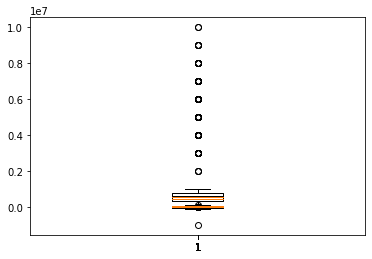

In [6]:
import matplotlib.pyplot as plt 

for col in ic_df.columns:
    if ic_df[col].dtype=='int64' or ic_df[col].dtype=='float64':
        plt.boxplot(ic_df[col])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a224819b80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a224828280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a224819820>],
 'medians': [<matplotlib.lines.Line2D at 0x1a224828940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a224828ca0>],
 'means': []}

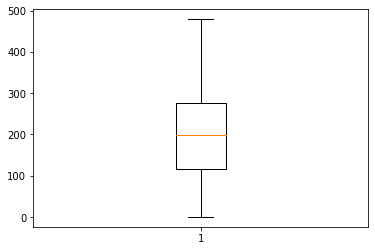

In [7]:
plt.boxplot(ic_df['months_as_customer'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a224876dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2248834c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a224876a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1a224883b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a224883ee0>],
 'means': []}

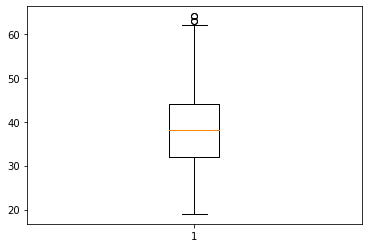

In [8]:
plt.boxplot(ic_df['age'])